In [2]:
import torch
import numpy as np
from IPython.core.debugger import set_trace
import imageio
import matplotlib.pyplot as plt
import torch.nn as nn
import torch.optim as optim


In [2]:
tc = [0.5, 14.0, 15.0, 28.0, 11.0, 8.0, 3.0, -4.0, 6.0, 13.0, 21.0]
tu = [35.7, 55.9, 58.2, 81.9, 56.3, 48.9, 33.9, 21.8, 48.4, 60.4, 68.4]
tc = torch.tensor(tc)
tu = 0.1*torch.tensor(tu)

n_samples = tu.shape[0]
n_val = int(0.2*n_samples)
shuffled_indices = torch.randperm(n_samples)
train_indices = shuffled_indices[:-n_val]
val_indices = shuffled_indices[-n_val:]

tc_val, tc_train = tc[val_indices], tc[train_indices]
tu_val, tu_train = tu[val_indices], tu[train_indices]


In [3]:
tu_train.unsqueeze_(-1)
tc_train.unsqueeze_(-1)
tu_val.unsqueeze_(-1)
tc_val.unsqueeze_(-1)
tu_train.shape,  tc_train.shape, tu_val.shape, tc_val.shape

(torch.Size([9, 1]),
 torch.Size([9, 1]),
 torch.Size([2, 1]),
 torch.Size([2, 1]))

In [4]:
def training_loop(n_epochs, optimizer, model, loss_fn, t_u_train, t_u_val, t_c_train, t_c_val):
    for epoch in range(1, n_epochs + 1):
        t_p_train = model(t_u_train)
        loss_train = loss_fn(t_p_train, t_c_train)
        t_p_val = model(t_u_val)

        loss_val = loss_fn(t_p_val, t_c_val)
        optimizer.zero_grad()
        loss_train.backward()
        optimizer.step()
        if epoch == 1 or epoch % 1000 == 0:
            print(f"Epoch {epoch}, Training loss {loss_train.item():.4f},"f" Validation loss {loss_val.item():.4f}")

Epoch 1, Training loss 210.0435, Validation loss 247.0864
Epoch 1000, Training loss 3.6988, Validation loss 2.2569
Epoch 2000, Training loss 3.1949, Validation loss 2.2072
Epoch 3000, Training loss 3.1869, Validation loss 2.2012
Parameter containing:
tensor([[5.3077]], requires_grad=True)
Parameter containing:
tensor([-17.2601], requires_grad=True)


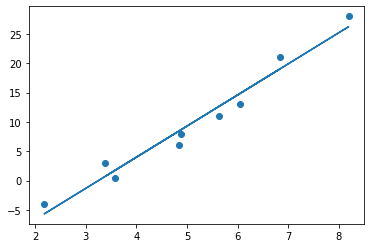

In [5]:
linear_model = nn.Linear(1, 1)
optimizer = optim.SGD(linear_model.parameters(), lr=1e-2)

training_loop(
    n_epochs = 3000,
    optimizer = optimizer,
    model = linear_model,
    loss_fn = nn.MSELoss(),
    t_u_train = tu_train,
    t_u_val = tu_val,
    t_c_train = tc_train,
    t_c_val = tc_val)

print(linear_model.weight)
print(linear_model.bias)

tp = linear_model(tu_train)

tp = tp.detach().numpy()
tu_train = tu_train.detach().numpy()
tc_train = tc_train.detach().numpy()

plt.plot(tu_train, tp)
plt.scatter(tu_train, tc_train)

In [6]:
from torchvision import datasets

In [7]:
cifar10 = datasets.CIFAR10(root="data", train=True, download=True)
cifar10_val = datasets.CIFAR10(root="data", train=False, download=True)


Files already downloaded and verified
Files already downloaded and verified


In [8]:
a = np.load("../MRI_other/TK_Modelling/AIF.npy")
b = np.load("../MRI_other/TK_Modelling/Example_Conc.npy")
a.shape,b.shape

((150,), (192, 192, 30, 150))

In [14]:
t = np.arange(0,366,2.45)
a = np.random.rand(2)
a = a.repeat((3,2))
print(a.shape)


(5,)


In [18]:
import torch.nn.functional as F

inputs = torch.randn(33, 16, 30)
filters = torch.randn(40, 16, 5)
F.conv1d(inputs, filters)

tensor([[[-1.1413e+01,  9.6063e+00, -2.2688e+01,  ...,  5.8269e-01,
          -6.5393e+00,  1.1547e+01],
         [ 1.2924e+00,  6.6198e+00, -1.6698e+00,  ..., -1.6737e+01,
          -1.1616e+01,  2.1790e+00],
         [-3.9786e+00,  7.2738e+00, -1.3667e+00,  ..., -5.1236e+00,
          -6.6464e+00,  9.6378e-01],
         ...,
         [ 5.1911e+00, -3.3776e+00, -8.9269e-03,  ..., -1.2931e+01,
           3.8133e+00, -1.8415e+01],
         [ 1.1356e-01, -3.0851e+00,  1.5154e+01,  ..., -5.8707e+00,
          -5.8576e+00,  1.4318e+01],
         [ 6.7334e+00, -5.7204e+00, -1.1297e+01,  ...,  4.5323e+00,
           2.9903e-01, -8.7881e+00]],

        [[-5.1621e-01,  1.2002e+01,  2.1204e+01,  ...,  1.1975e+01,
          -1.0445e+01,  1.9311e+01],
         [ 5.3616e-01, -4.3754e+00,  3.0060e+00,  ..., -1.2160e+00,
          -1.2373e+01,  4.7359e+00],
         [-3.8869e+00,  6.8718e+00, -4.8443e+00,  ...,  2.4981e+00,
           9.7766e+00,  4.5195e+00],
         ...,
         [ 2.2587e+00,  7